Epoch 0: Loss = 175.0329
Epoch 50: Loss = 9.7667
Epoch 100: Loss = 6.3029
Epoch 150: Loss = 4.6482
Epoch 200: Loss = 3.8537
Epoch 250: Loss = 3.4695
Epoch 300: Loss = 3.2819
Epoch 350: Loss = 3.1892
Epoch 400: Loss = 3.1425
Epoch 450: Loss = 3.1186


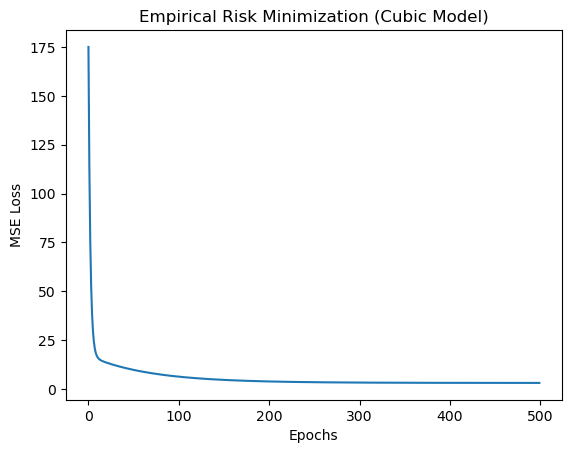

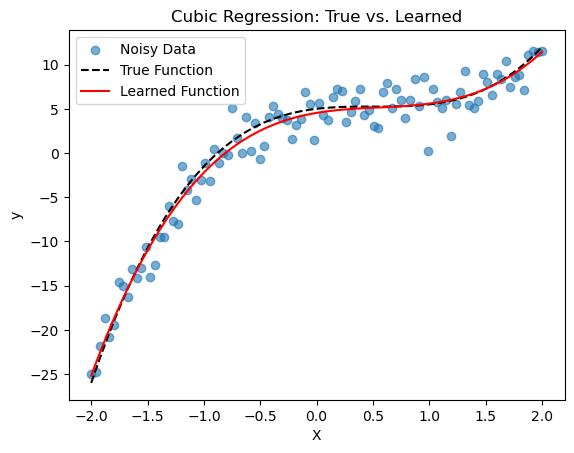

Final parameters: w3 = 1.7528, w2 = -2.8496, w1 = 2.1449, w0 = 4.5399


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate synthetic dataset
np.random.seed(42)
n = 100  # Number of data points
X = np.linspace(-2, 2, n)  # Input values
true_w3, true_w2, true_w1, true_w0 = 2, -3, 1.5, 5  # True coefficients
noise = np.random.normal(scale=2, size=n)  # Gaussian noise
y = true_w3 * X**3 + true_w2 * X**2 + true_w1 * X + true_w0 + noise  # True function

# Initialize parameters randomly
w3, w2, w1, w0 = np.random.randn(4)

# Hyperparameters
learning_rate = 0.01
epochs = 500

# Store loss for visualization
loss_history = []

# Gradient Descent Loop
for epoch in range(epochs):
    # Compute predictions
    y_pred = w3 * X**3 + w2 * X**2 + w1 * X + w0
    
    # Compute Mean Squared Error (MSE)
    loss = np.mean((y - y_pred) ** 2)
    loss_history.append(loss)

    # Compute gradients
    dw3 = -2 * np.mean(X**3 * (y - y_pred))
    dw2 = -2 * np.mean(X**2 * (y - y_pred))
    dw1 = -2 * np.mean(X * (y - y_pred))
    dw0 = -2 * np.mean(y - y_pred)

    # Update parameters
    w3 -= learning_rate * dw3
    w2 -= learning_rate * dw2
    w1 -= learning_rate * dw1
    w0 -= learning_rate * dw0

    # Print progress
    if epoch % 50 == 0:
        print(f"Epoch {epoch}: Loss = {loss:.4f}")

# Plot Loss Function
plt.plot(range(epochs), loss_history)
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.title('Empirical Risk Minimization (Cubic Model)')
plt.show()

# Plot True Function vs. Learned Function
plt.scatter(X, y, label='Noisy Data', alpha=0.6)
plt.plot(X, true_w3 * X**3 + true_w2 * X**2 + true_w1 * X + true_w0, label='True Function', linestyle='dashed', color='black')
plt.plot(X, w3 * X**3 + w2 * X**2 + w1 * X + w0, label='Learned Function', color='red')
plt.xlabel('X')
plt.ylabel('y')
plt.title('Cubic Regression: True vs. Learned')
plt.legend()
plt.show()

# Print final parameters
print(f"Final parameters: w3 = {w3:.4f}, w2 = {w2:.4f}, w1 = {w1:.4f}, w0 = {w0:.4f}")
